<a href="https://colab.research.google.com/github/QuangAnh000/lab4/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
from google.colab import files
uploaded = files.upload()

Saving titanic_disaster.csv to titanic_disaster.csv


In [181]:
import pandas as pd



def load_data(titanic_disaster):
    data = pd.read_csv(titanic_disaster + ".csv")
    return data.head(10)

In [182]:
missing_data = data.isnull().sum()
print(missing_data)

Name         2
Age          3
Weight       5
m0006        5
HeartRate    2
col6         2
col7         2
col8         2
col9         3
col10        2
dtype: int64


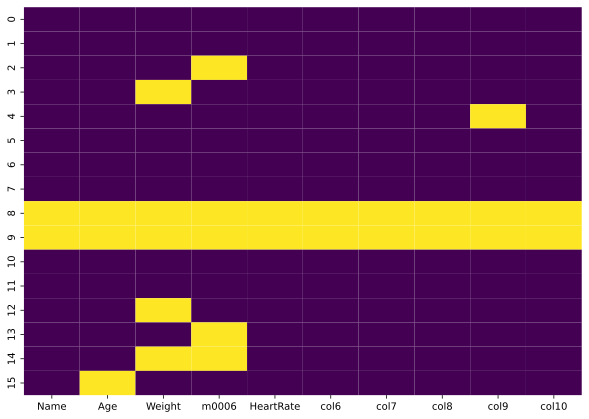

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [187]:
data['Name'] = data['Name'].astype(str)
# Split the 'Name' column and handle cases with more than one comma
split_names = data['Name'].str.split(',', n=1, expand=True)
# Assign the first element of the split to 'firstName'
data['firstName'] = split_names[0]
# If the split result has 2 columns, assign the second element to 'secondName', otherwise assign an empty string
data['secondName'] = split_names[1] if len(split_names.columns) > 1 else ''
data.drop(columns=['Name'], inplace=True)

In [190]:
# Check if 'Sex' column exists before attempting replacement
if 'Sex' in data.columns:
    data['Sex'] = data['Sex'].replace({'male': 'M', 'female': 'F'})
else:
    print("Column 'Sex' not found in the DataFrame.")

Column 'Sex' not found in the DataFrame.


Saving titanic_disaster.csv to titanic_disaster (1).csv
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          7
Embarked       0
dtype: int64


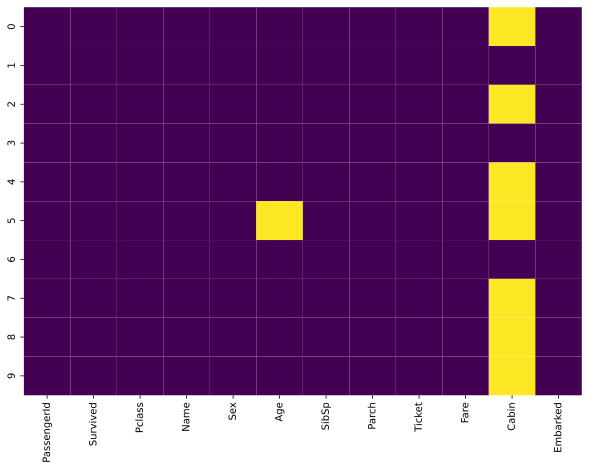

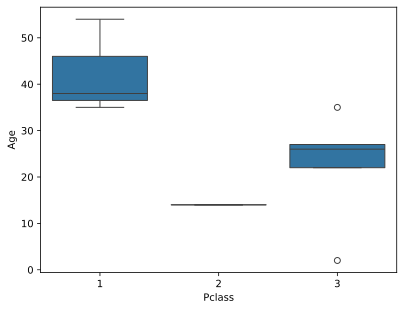

In [192]:
from IPython import get_ipython
from IPython.display import display
# %% [markdown]
#
# %%
from google.colab import files
uploaded = files.upload()
# %% [markdown]
#
# %%
import pandas as pd



def load_data(titanic_disaster):
    data = pd.read_csv(titanic_disaster + ".csv")
    return data.head(10) # previously .head(10)
# %% [markdown]
#
# %%
# Assign the loaded data to the 'data' variable
data = load_data('titanic_disaster') # Assuming your CSV file is named 'titanic_disaster.csv'

missing_data = data.isnull().sum()
print(missing_data)
# %% [markdown]
#
# %%
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()
# %% [markdown]
#
# %%
data['Name'] = data['Name'].astype(str)
# Split the 'Name' column and handle cases with more than one comma
split_names = data['Name'].str.split(',', n=1, expand=True)
# Assign the first element of the split to 'firstName'
data['firstName'] = split_names[0]
# If the split result has 2 columns, assign the second element to 'secondName', otherwise assign an empty string
data['secondName'] = split_names[1] if len(split_names.columns) > 1 else ''
data.drop(columns=['Name'], inplace=True)
# %% [markdown]
#
# %%
# Check if 'Sex' column exists before attempting replacement
if 'Sex' in data.columns:
    data['Sex'] = data['Sex'].replace({'male': 'M', 'female': 'F'})
else:
    print("Column 'Sex' not found in the DataFrame.")
# %% [markdown]
#
# %%
sns.boxplot(x='Pclass', y='Age', data=data)
plt.show()

In [193]:
age_mean = data.groupby('Pclass')['Age'].transform('mean')
data['Age'].fillna(age_mean, inplace=True)

<ipython-input-193-339ae5c5ae15>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(age_mean, inplace=True)


In [194]:
bins = [0, 12, 18, 60, 100]
labels = ['Kid', 'Teen', 'Adult', 'Older']
data['Agegroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

In [195]:
data['namePrefix'] = data['secondName'].apply(lambda x: x.split('.')[0] if isinstance(x, str) else 'Unknown')

In [196]:
data['familySize'] = 1 + data['SibSp'] + data['Parch']

In [197]:
data['Alone'] = data['familySize'].apply(lambda x: 1 if x == 1 else 0)

In [198]:
data['typeCabin'] = data['Cabin'].str[0].fillna('Unknown')

In [202]:
import pandas as pd



test_data = pd.read_csv('titanic_disaster.csv')

train_data = data[~data['PassengerId'].isin(test_data['PassengerId'])]

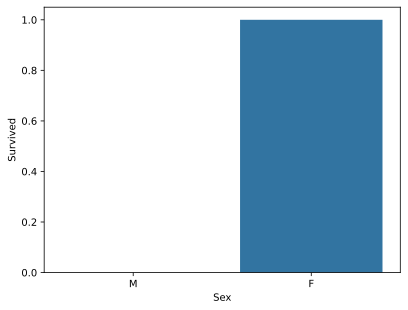

In [203]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

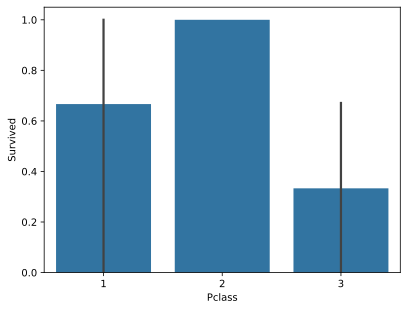

In [204]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

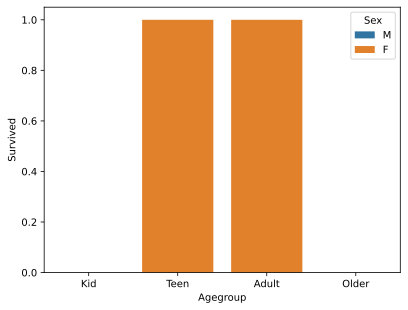

In [205]:
sns.barplot(x='Agegroup', y='Survived', hue='Sex', data=data)
plt.show()

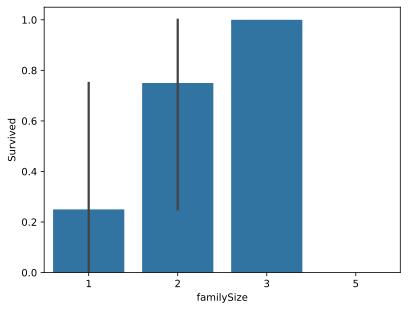

In [206]:
sns.barplot(x='familySize', y='Survived', data=data)
plt.show()

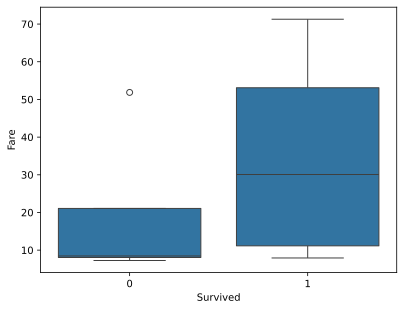

In [207]:
sns.boxplot(x='Survived', y='Fare', data=data)
plt.show()

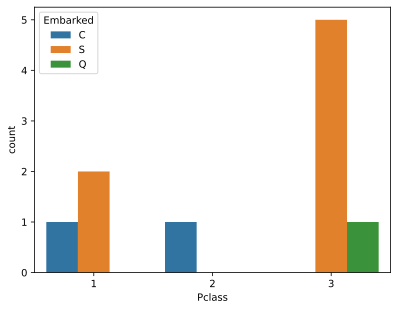

In [208]:
sns.countplot(x='Pclass', hue='Embarked', data=data)
plt.show()